In [65]:
import pandas as pd


ruta_archivo = 'TODOS_comentarios_negativos_categorizados.csv'

# Carga el archivo CSV en un DataFrame de pandas
df = pd.read_csv(ruta_archivo)

# Muestra las primeras filas del DataFrame para verificar que se ha cargado correctamente
df.head()

,Unnamed: 0,video_id,author,comment,comment_stem,vectores_tfidf,sentiment,sentiment_2,hateful,targeted,aggressive,topico,category
0,0,T-smnnEAdM0,UCTlJjNviHj7Y32eiOdHH_FQ,['No me creo que les importemos algo. Estos so...,creo importemo misma opini,[0. 0. 0. ... 0. 0. 0.],0.0,-1.0,0.073077,0.004245,0.030084,amnistia,racismo
1,1,T-smnnEAdM0,UC6o_ckmEk87f7TiViatW11w,['No a la ANMISTIA y no AL PERDONA LA DEUDA DE...,anmistia perdona deuda catalu sirv separatista...,[0. 0. 0. ... 0. 0. 0.],-1.0,-1.0,0.052020,0.005793,0.051741,amnistia,ideología política
2,2,T-smnnEAdM0,UCCXQ_BAzI-GcXgDUwN4XiXQ,"['Que no te enteras,Contreras\nQue se la trae ...",entera contrera trae floja asunto interno espa...,[0. 0. 0. ... 0. 0. 0.],-1.0,-1.0,0.562841,0.014446,0.309607,amnistia,ideología política
3,3,T-smnnEAdM0,UCB4dg7xkDRLpW561xlwNnyw,"['¿Como puede ser impecable?, si hasta hace po...",pued impec hace bocachancla palanganero felon ...,[0. 0. 0. ... 0. 0. 0.],-1.0,-1.0,0.115163,0.025937,0.126386,amnistia,ideología política
4,4,T-smnnEAdM0,UCFc7zfxN235QsmGBJ-GsUcA,['Osea que cuando gobierna el PP nos roba y me...,osea gobierna roba mete guerra aqui pasa gobie...,[0. 0. 0. ... 0. 0. 0.],-1.0,-1.0,0.645626,0.008227,0.292196,amnistia,racismo


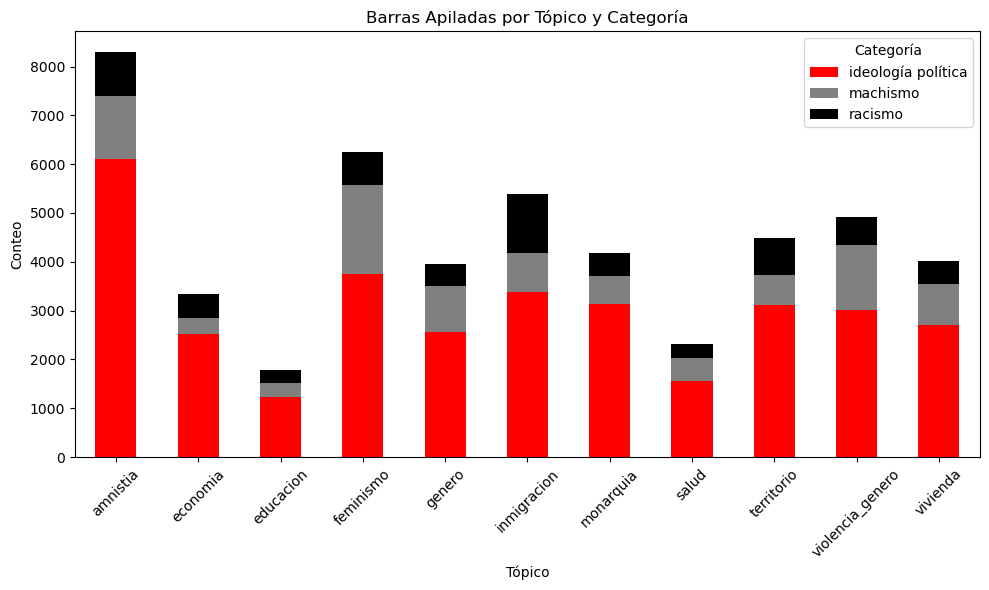

In [9]:
import pandas as pd
import matplotlib.pyplot as plt



# Crear una tabla pivot para contar las categorías por cada tópico
pivot_data = data.groupby(['topico', 'category']).size().unstack().fillna(0)

# Definir una paleta de colores personalizada
colores = ['red', 'gray', 'black']  # Puedes ajustar los colores aquí

# Crear el gráfico de barras apiladas con la paleta de colores
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=colores)

# Personalizar el gráfico con etiquetas y título
plt.xlabel('Tópico')
plt.ylabel('Conteo')
plt.title('Barras Apiladas por Tópico y Categoría')

# Mostrar el gráfico
plt.legend(title='Categoría')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


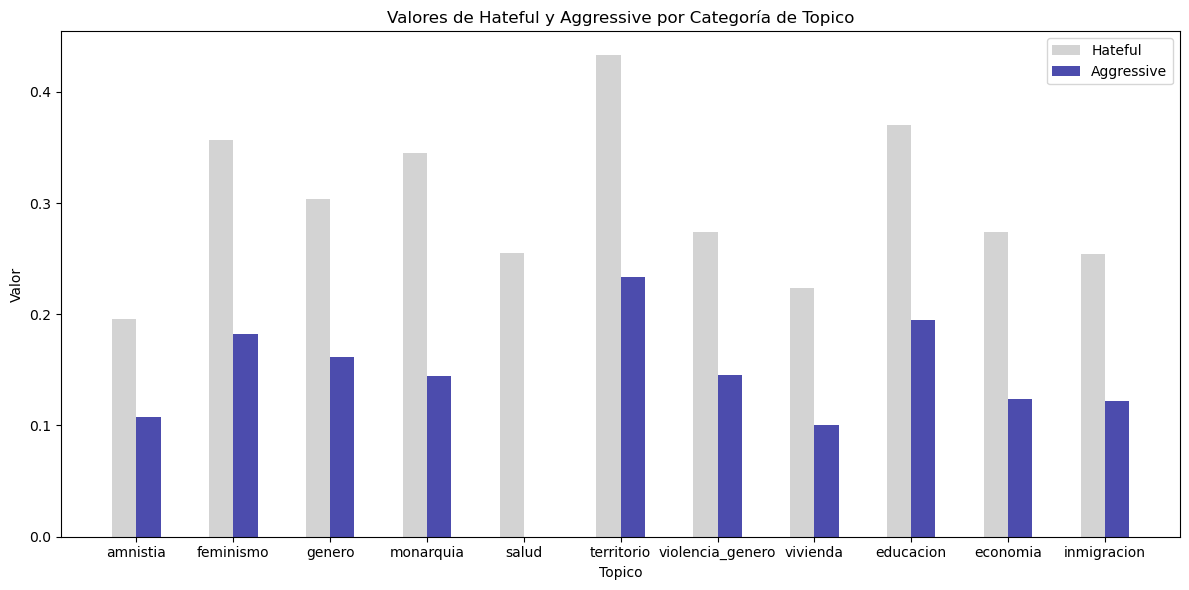

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que 'topico', 'hateful' y 'aggressive' son columnas en tu DataFrame 'df'

# Agrupar por la columna 'topico'
grouped = df.groupby('topico')

# Obtener las categorías únicas de 'topico'
categories = df['topico'].unique()

# Calcular el ancho de cada barra
bar_width = 0.5
index = np.arange(len(categories))

# Crear el gráfico de barras separadas para 'hateful' y 'aggressive' por cada categoría de 'topico'
plt.figure(figsize=(12, 6))

hateful_values = []
aggressive_values = []

for i, (name, group) in enumerate(grouped):
    hateful_means = group['hateful'].mean()
    aggressive_means = group['aggressive'].mean()

    hateful_values.append(hateful_means)
    aggressive_values.append(aggressive_means)

plt.bar(index - bar_width / 4, hateful_values, bar_width / 2, label='Hateful', color='darkgrey', alpha=0.5)
plt.bar(index + bar_width / 4, aggressive_values, bar_width / 2, label='Aggressive', color='darkblue', alpha=0.7)

plt.xlabel('Topico')
plt.ylabel('Valor')
plt.title('Valores de Hateful y Aggressive por Categoría de Topico')
plt.xticks(index, categories)
plt.legend()
plt.tight_layout()
plt.show()


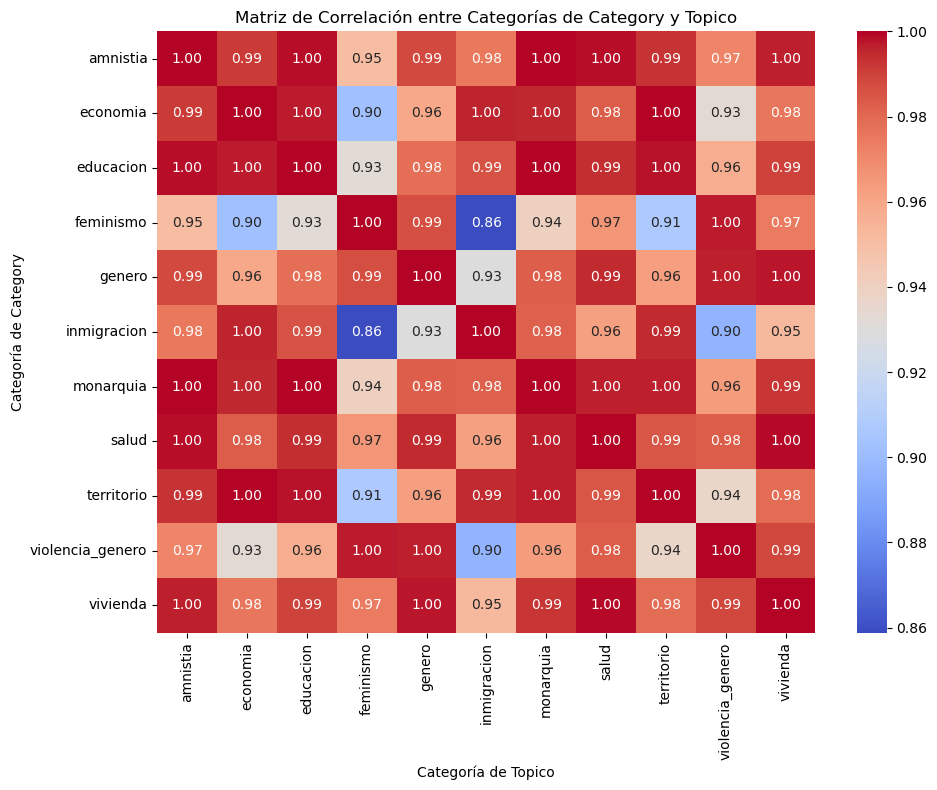

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'category' y 'topico' son columnas en tu DataFrame 'df'

# Crear una tabla de frecuencia (crosstab) entre 'category' y 'topico'
cross_tab = pd.crosstab(df['category'], df['topico'])

# Calcular la matriz de correlación entre las categorías
correlation_matrix = cross_tab.corr()

# Crear un heatmap con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Categorías de Category y Topico')
plt.xlabel('Categoría de Topico')
plt.ylabel('Categoría de Category')
plt.tight_layout()


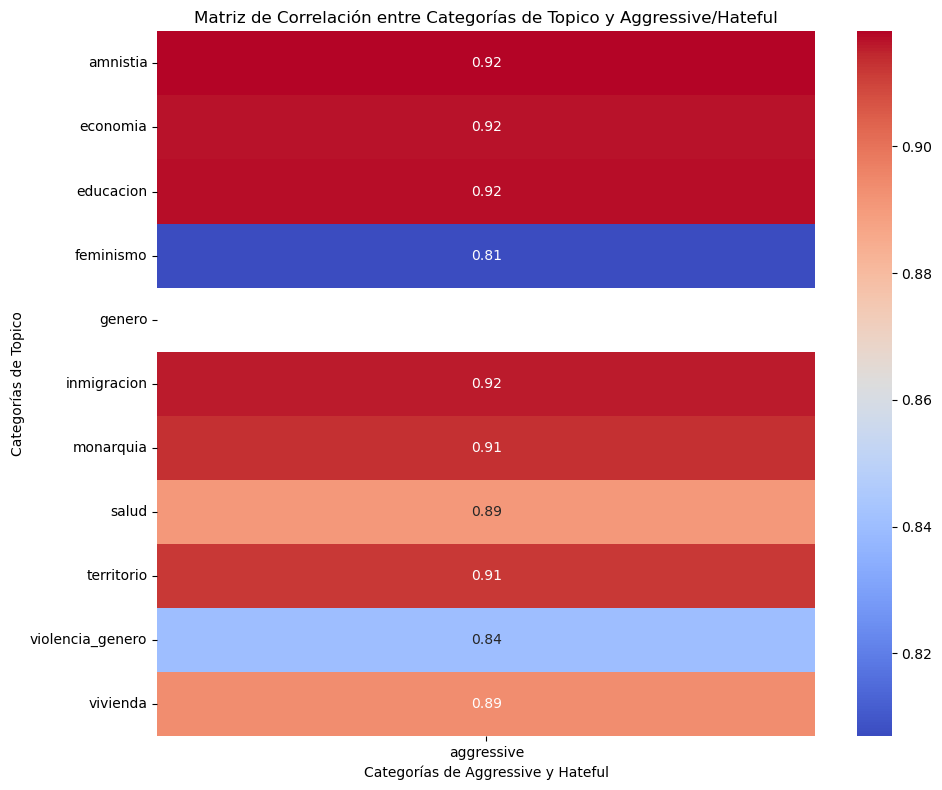

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'topico', 'aggressive' y 'hateful' son columnas en tu DataFrame 'df'

# Calcular la matriz de correlación entre 'topico', 'aggressive' y 'hateful'
correlation_matrix = df.groupby('topico')[['aggressive', 'hateful']].corr().iloc[0::2, -1].unstack()

# Crear un heatmap con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Categorías de Topico y Aggressive/Hateful')
plt.xlabel('Categorías de Aggressive y Hateful')
plt.ylabel('Categorías de Topico')
plt.tight_layout()
plt.show()


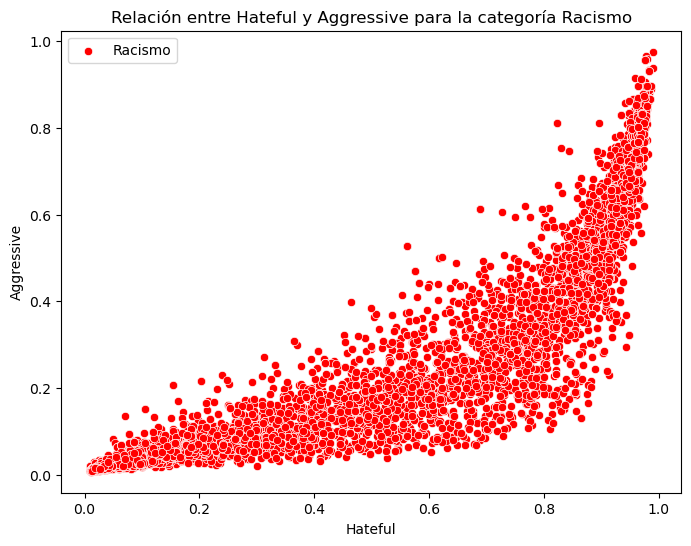

In [48]:
# Filtrar el DataFrame para obtener solo las filas correspondientes a la categoría 'racismo'
racismo_data = df[df['category'] == 'racismo']

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hateful', y='aggressive', data=racismo_data, label='Racismo', color='red')

plt.xlabel('Hateful')
plt.ylabel('Aggressive')
plt.title('Relación entre Hateful y Aggressive para la categoría Racismo')
plt.legend()
plt.show()


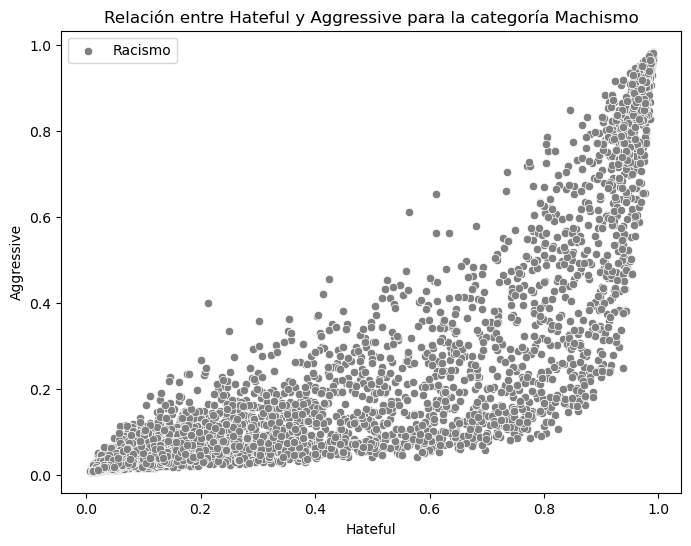

In [60]:
# Filtrar el DataFrame para obtener solo las filas correspondientes a la categoría 'racismo'
racismo_data = df[df['category'] == 'machismo']

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hateful', y='aggressive', data=racismo_data, label='Racismo', color='grey')

plt.xlabel('Hateful')
plt.ylabel('Aggressive')
plt.title('Relación entre Hateful y Aggressive para la categoría Machismo')
plt.legend()
plt.show()



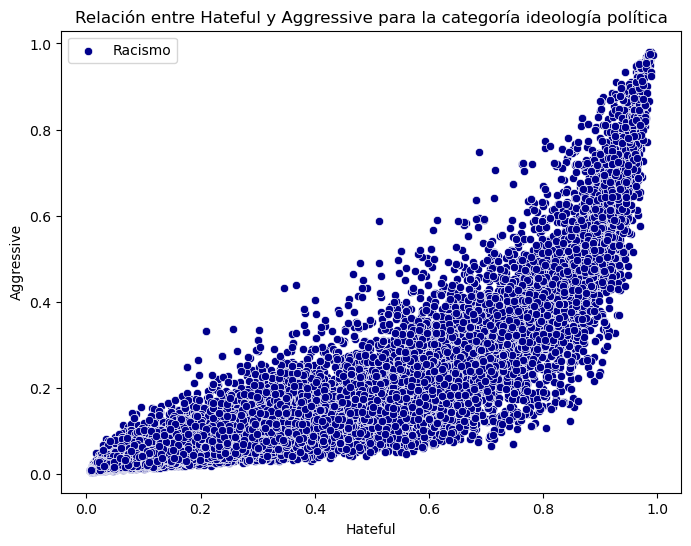

In [61]:
# Filtrar el DataFrame para obtener solo las filas correspondientes a la categoría 'racismo'
racismo_data = df[df['category'] == 'ideología política']

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hateful', y='aggressive', data=racismo_data, label='Racismo', color='darkblue')

plt.xlabel('Hateful')
plt.ylabel('Aggressive')
plt.title('Relación entre Hateful y Aggressive para la categoría ideología política')
plt.legend()
plt.show()



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/usuario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/usuario/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


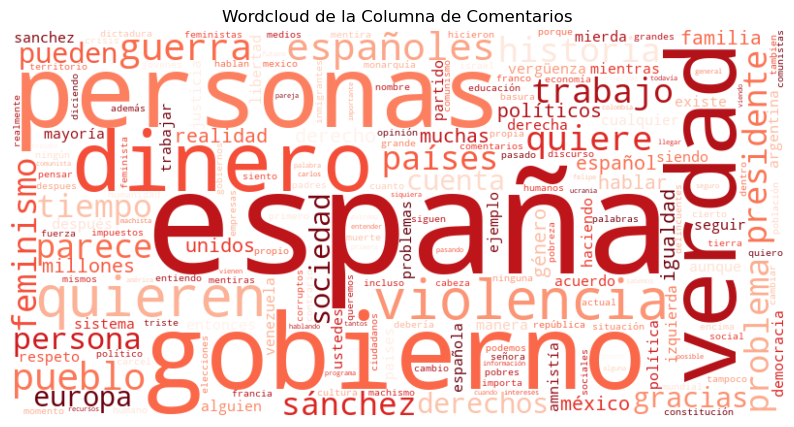

In [82]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

nltk.download('stopwords')
nltk.download('punkt')

# Suponiendo que 'comment' es la columna de texto en tu DataFrame 'df'
text_data = ' '.join(df['comment'].astype(str).tolist())

# Tokenización y eliminación de stopwords y signos de puntuación
stop_words = set(stopwords.words('spanish'))  # Reemplaza 'spanish' con tu idioma
tokens = word_tokenize(text_data.lower())

# Limpieza de los tokens
clean_tokens = []
for token in tokens:
    # Reemplazar caracteres que no sean letras por espacios
    #token = re.sub("[^a-zA-Z\s]", " ", str(token))
    token = token.lower()  # Convertir a minúsculas
    token = re.sub(r'\W', ' ', token)  # Remover caracteres especiales
    token = re.sub(r'\s+', ' ', token, flags=re.I)  # Remover múltiples espacios
    token = re.sub(r'[^\w\s]', '', token) # Remover puntuaciones
    # Eliminar palabras específicas (hombres, mujeres, hombre, mujer)
    token = re.sub(r'\b(?:hombres|mujeres|hombre|mujer|siempre)\b', '', token)
    clean_tokens.append(token)

# Eliminación de stopwords y palabras de longitud 1
clean_tokens = [word for word in clean_tokens if word not in stop_words and len(word) > 5]

# Crear un diccionario de frecuencias de palabras
word_freq = {}
for word in clean_tokens:
    if word not in word_freq:
        word_freq[word] = 1
    else:
        word_freq[word] += 1

# Crear el wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(word_freq)

# Visualizar el wordcloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud de la Columna de Comentarios')
plt.show()





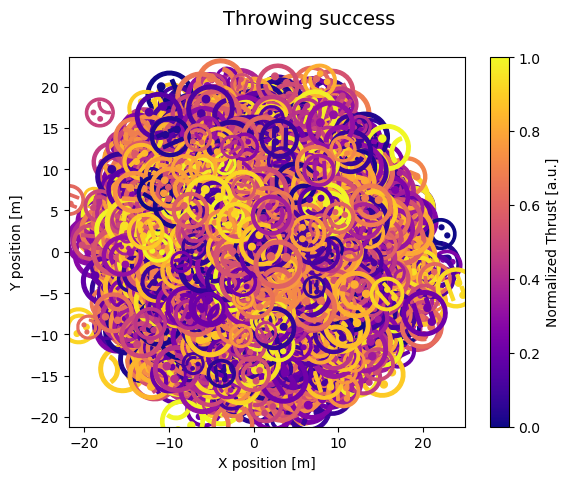

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.markers import MarkerStyle
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D

# De df_hate_amnistia tiene las columnas category
N = len(df['category'])
SUCCESS_SYMBOLS = [
    TextPath((0, 0), "☹"),
    TextPath((0, 0), "😒"),
    TextPath((0, 0), "☺"),
]

np.random.seed(42)
skills = np.random.uniform(5, 80, size=N) * 0.1 + 5
takeoff_angles = np.random.normal(0, 90, N)
thrusts = np.random.uniform(size=N)
successful = np.random.randint(0, 3, N)
positions = np.random.normal(size=(N, 2)) * 5

cmap = plt.cm.plasma
fig, ax = plt.subplots()
fig.suptitle("Throwing success", size=14)
for skill, takeoff, thrust, mood, pos in zip(skills, takeoff_angles, thrusts, successful, positions):
    t = Affine2D().scale(skill).rotate_deg(takeoff)
    m = MarkerStyle(SUCCESS_SYMBOLS[mood], transform=t)
    ax.plot(pos[0], pos[1], marker=m, color=cmap(thrust))

fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 1), cmap=cmap), ax=ax, label="Normalized Thrust [a.u.]")
ax.set_xlabel("X position [m]")
ax.set_ylabel("Y position [m]")

plt.show()